In [1]:
import numpy as np
import FuncParcel
from scipy import stats
import matplotlib.pyplot as plt
import nibabel as nib
import matplotlib as mpl
from matplotlib import colors
import pickle
from collections import Counter
%matplotlib inline
from sklearn.metrics import mutual_info_score as NMI
from sklearn.metrics import adjusted_rand_score as RAND

In [14]:
Thalamus_voxel_coordinate = np.loadtxt('/home/despoB/connectome-thalamus/ROIs/thalamus_voxels_ijk_indices', dtype = int)

def visualize_parcellation(CIs, cmap, savepath):
    # show volum image
    MNI_img = nib.load('/home/despoB/connectome-thalamus/ROIs/MNI152_T1_2mm_brain.nii.gz')
    MNI_data = MNI_img.get_data()

    # create mask for parcel
    Mask = np.zeros(MNI_data.shape)


    # assign CI to each subcortical voxel
    for i, CI in enumerate(CIs):
        Mask[Thalamus_voxel_coordinate[i,0], Thalamus_voxel_coordinate[i,1], Thalamus_voxel_coordinate[i,2]] = CIs[i].astype(int)
    Mask = np.ma.masked_where(Mask == 0, Mask)

    # flip dimension to show anteiror of the brain at top
    MNI_data = MNI_data.swapaxes(0,1)
    Mask = Mask.swapaxes(0,1)

    # some plot setting (colormap), interplotation..
    #cmap = colors.ListedColormap(['red', 'blue', 'cyan', 'yellow', 'teal', 'purple', 'pink', 'green', 'black'])
    #cmap = colors.ListedColormap(['blue', 'red', 'cyan', 'yellow', 'green'])
    # display slice by slice
    Z_slices = range(np.min(Thalamus_voxel_coordinate[:,2])+2, np.max(Thalamus_voxel_coordinate[:,2])-2,1)
    fig = plt.figure()
    for i, Z_slice in enumerate(Z_slices):
        #if i <4:
        a = plt.subplot(2, len(Z_slices)/2, i+1 )
        #else:
        #    a = plt.subplot(2, len(Z_slices)/2, i+1-4 )
        a.set_yticks([])
        a.set_xticks([])
        plt.imshow(MNI_data[40:80, 25:65, Z_slice], cmap='gray', interpolation='nearest')
        plt.imshow(Mask[40:80, 25:65, Z_slice],cmap=cmap, interpolation='none', vmin = 1, vmax=9)
        plt.ylim(plt.ylim()[::-1])
        
    fig.tight_layout() 
    fig.set_size_inches(18.5,10.5) 
    
    plt.savefig(savepath, bbox_inches='tight')

In [19]:
MGH_CIs = np.loadtxt('/home/despoB/kaihwang/Rest/Thalamic_parcel/MGH_Thalamus_clusters_sort_by_max_corticalCI')
NKI_CIs = np.loadtxt('/home/despoB/kaihwang/Rest/Thalamic_parcel/NKI_Thalamus_clusters_sort_by_max_corticalCI')

In [20]:
np.unique(MGH_CIs)
np.unique(NKI_CIs)

array([ 2.,  3.,  5.,  6.,  8.,  9.])

In [21]:
cmap = colors.ListedColormap(['red', 'purple', 'green', 'yellow', 'cyan', 'blue', 'brown', 'pink', 'teal'])

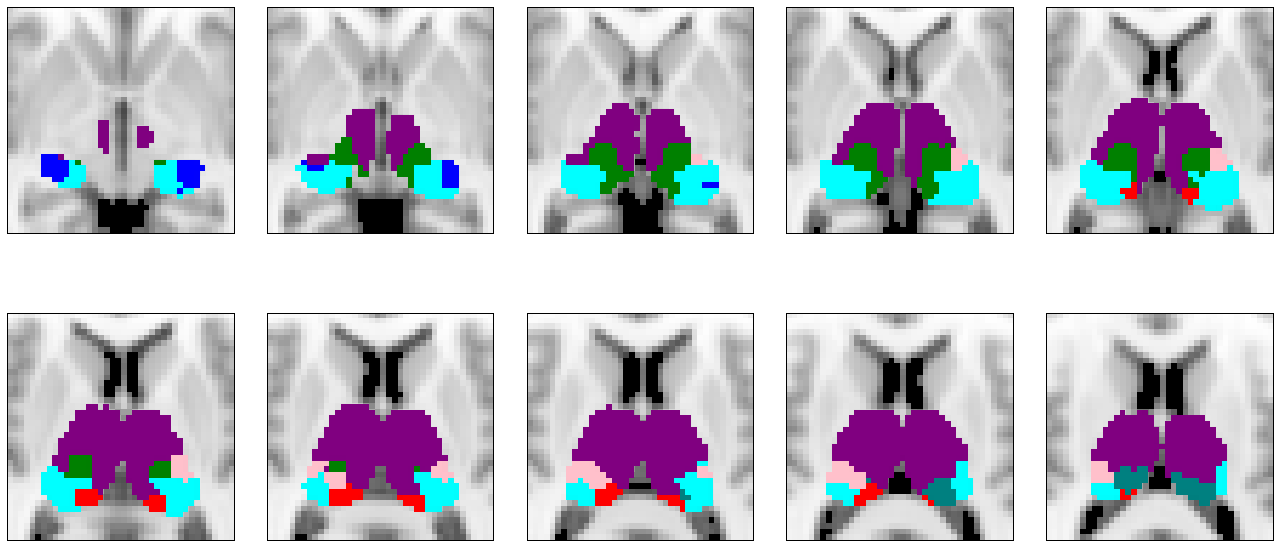

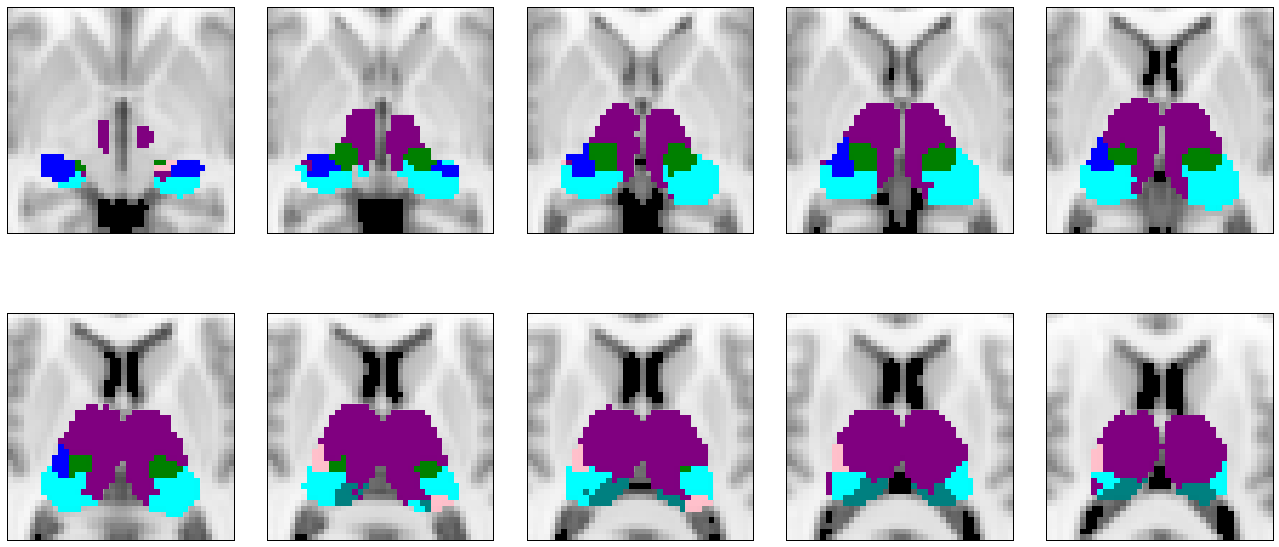

In [22]:
visualize_parcellation(MGH_CIs, cmap, 'Data/MGH_consensus_maxCI_Tha_Parcel.png')
visualize_parcellation(NKI_CIs, cmap, 'Data/NKI_consensus_maxCI_Tha_Parcel.png')